# Modelo de regresión lineal
## Wilder Araque Caicedo
## Análisis de Datos
## UNAD

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression 

In [7]:
# Cargue del dataset car details v4.csv desde ruta del notebook
Vehiculos = pd.read_csv('car details v4.csv')
# Cargue de la información del dataset
Vehiculos.head()
# Información del dataset: cantidad de datos, columnas y tipo de dato
Vehiculos.info()
# Identificación de la mediana, valor mínimo y máximo y los cuartiles
Vehiculos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [11]:
# Codificación de las variables categóricas 'Make' y 'Model' utilizando LabelEncoder en valores numéricas
label_encoder_make = LabelEncoder()
label_encoder_model = LabelEncoder()

# Aplicación  del codificador a las columnas
Vehiculos['Make'] = label_encoder_make.fit_transform(Vehiculos['Make'])
Vehiculos['Model'] = label_encoder_model.fit_transform(Vehiculos['Model'])

# Estructura de la base de datos después de la codificación
Vehiculos[['Make', 'Model', 'Price']].head()

,Make,Model,Price
0,7,106,505000
1,19,802,450000
2,8,1030,220000
3,30,492,799000
4,30,548,1950000


In [13]:
# Reemplazo de valores en blanco con la mediana para cada columna numérica relevante
Vehiculos.fillna(Vehiculos.median(numeric_only=True), inplace=True)

# Verificación de valores nulos restantes
Vehiculos.isnull().sum()

data.fillna(data.mean(), inplace=True)


Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64

In [19]:
# Eliminación de valores atípicos por el método de cuartiles

# Identificar y eliminar valores atípicos en la columna 'Price' usando el rango intercuartílico (IQR)
Q1 = Vehiculos['Price'].quantile(0.25)
Q3 = Vehiculos['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar valores atípicos
limiteInferior = Q1 - 1.5 * IQR
limiteSuperior = Q3 + 1.5 * IQR

# Filtrar los datos para excluir los valores atípicos de 'Price'
VehiculosSinOutliers = Vehiculos[(Vehiculos['Price'] >= limiteInferior) & (Vehiculos['Price'] <= limiteSuperior)]

# Comparación del tamaño del DataFrame original y el nuevo sin valores atípicos
print("Tamaño original:", Vehiculos.shape[0])
print("Tamaño sin valores atípicos:", VehiculosSinOutliers.shape[0])


Tamaño original: 2059
Tamaño sin valores atípicos: 1844


In [21]:
# Selección de variable dependiente 'Price' e independientes 'Year' y 'Kilometer'
X = Vehiculos[['Year', 'Kilometer']]  # Variables independientes
y = Vehiculos['Price']                  # Variable dependiente

In [23]:
# Selección de datos Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Creación del modelo de regresión lineal para los datos de entrenamiento
regresionLineal = LinearRegression()

# Entrenamiento del modelo
regresionLineal.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predecir en el conjunto de prueba sobre el modelo entrenado
y_pred = regresionLineal.predict(X_test)

In [30]:
# Cálculo del error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Cáculo del coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 6271375701350.43
R-squared (R2): 0.10233003312099354


In [ ]:
plt.scatter(Vehiculos['Kilometer'], y, color='blue', label='Kilometraje')
plt.xlabel('Kilometer')
plt.ylabel("Price")
plt.title('Regresión Lineal: Kilometer vs Price')
plt.axhline(0, color='red', linestyle='--')
plt.show()

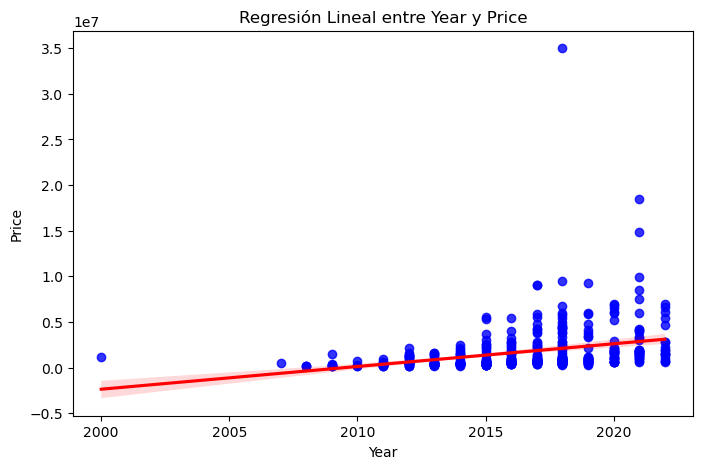

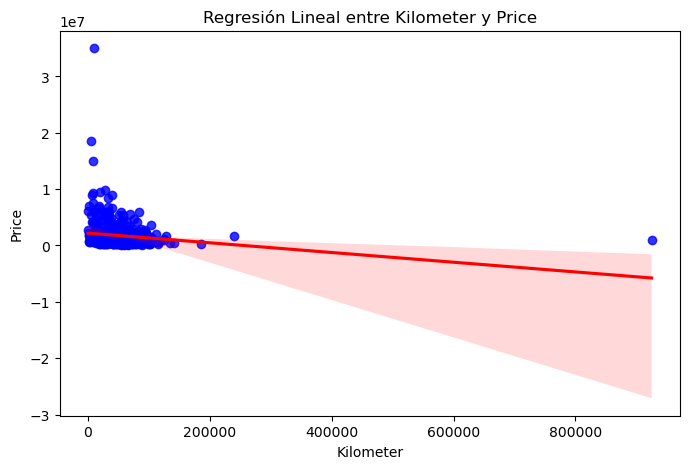

In [40]:
for Make in X_test.columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=X_test[Make], y=y_test, line_kws={"color": "red"}, scatter_kws={"color": "blue"})
    plt.xlabel(Make)
    plt.ylabel("Price")
    plt.title(f'Regresión Lineal entre {Make} y Price')
    plt.show()